In [1]:
%reset -f
import pandas as pd
import numpy as np
import seaborn as sns
import pickle, os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

2023-03-31 16:24:49.392928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/local/apps/gcc/8.2.0/lib:/cm/local/apps/gcc/8.2.0/lib64:/cm/local/apps/torque/6.1.3/lib
2023-03-31 16:24:49.392957: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path = r'/home/d/dlr10/Documents/02_Statitics_modelling'
#pickles_files = [x for x in os.listdir(path+ r'/3_Modelling_V3/Static_Data_First_Day/Data_Balanced') if '.pickle' in x]

In [3]:
columns = ['DataType', 'CollectionTime', 'Skewness', 'FeatureEngineering', 'Classifier', 
           'CurbStrat', 'AgeStrat', 'AUC', 'Recall', 'Precision', 'Accuracy', 'Brier', 'F1_score']
df_results = pd.DataFrame(columns = columns)

In [4]:
data_type    = ['3_Modelling_V3','3_Modelling_V3_CURB_tiers', '4_Modelling_TS']
data_collect = {'Static_Data_First_Day':'1st','Static_Data_PnT':'Pnt' }
data_distrib = {'Data_Unbalanced':'Unbal', 'Data_Balanced':'Bal'}

In [5]:
# =========================================================
# STATIC VARIABLES WITH AGE STRATIFICATION FOLDER 3_MODELLING_V3
# ===========================================================
folder = r'/3_Modelling_V3'

for idx_1, folder_1 in enumerate(data_collect.keys()):
    clf_name1 = folder_1.replace("Static_Data_","")
    for folder_2 in data_distrib.keys():
        clf_name2 = folder_2.replace("PnT_","").replace("Static_Data_","")
        clf_name3 = clf_name1 + " " + clf_name2 
        new_path  = path + folder + r'/' + folder_1 + r'/' + folder_2        
        pickles   = [x for x in os.listdir(new_path) if '.pickle' in x]
        for pick in pickles:
            pickle_path = new_path + r'/' + pick
            results, dict_auroc = pickle.load(open(pickle_path,'rb'))

            Model_type = 'Static'
            Mod_coltim = data_collect[folder_1]
            Mod_skwnss = data_distrib[folder_2]
            Mod_clssfr = pick.replace('dict_fpr_trp_',"").replace(' Classifier.pickle',"")
            Mod_crb_st = np.nan
            for indx in results.index:
                #print(indx)
                if '65' not in indx:
                    Mod_FeatEn = indx
                    Mod_agestr = np.nan

                else:
                    Mod_agestr = indx
                    Mod_FeatEn = np.nan
                Mod_auroc = results.loc[indx, 'AUC']
                Mod_recll = results.loc[indx, 'Recall']
                
                Mod_precs = results.loc[indx, 'Precision']
                Mod_accrc = results.loc[indx, 'Accuracy']
                Mod_Brier = results.loc[indx, 'brier']
                Mod_F1Sco = results.loc[indx, 'F1_Score']

                model = [Model_type, Mod_coltim, Mod_skwnss, Mod_FeatEn,Mod_clssfr, Mod_crb_st, Mod_agestr, Mod_auroc, Mod_recll,
                        Mod_precs, Mod_accrc, Mod_Brier, Mod_F1Sco]
                df_results = pd.concat([df_results, pd.DataFrame([model], columns = columns )])

In [6]:
print(len(df_results))

162


In [7]:
# =========================================================
# STATIC VARIABLES WITH CURB STRATIFICATION FOLDER 3_Modelling_V3_CURB_tiers
# ===========================================================
folder   = r'/3_Modelling_V3_CURB_tiers'
new_path = path + folder
pickles  = [x for x in os.listdir(new_path) if '.pickle' in x]
for pick in pickles:
    pickle_path = new_path + r'/' + pick
    results = pickle.load(open(pickle_path,'rb'))
    for idx, results_crb in enumerate(results[0]):
        df = results_crb[1] 
        Model_type = 'Static'
        
        if 'pnt' in pick: 
            Mod_coltim = 'Pnt'
            Mod_clssfr = pick.replace('pnt_dict_fpr_trp_',"").replace(' Classifier.pickle',"")
        else:
            Mod_coltim = '1st'
            if 'Bal' in pick:
                Mod_skwnss = 'Bal'
                Mod_clssfr = pick.replace('dict_fpr_trp_Bal_',"").replace(' Classifier.pickle',"")
            else:
                Mod_skwnss = 'Unbal'
                Mod_clssfr = pick.replace('dict_fpr_trp_',"").replace(' Classifier.pickle',"")
            
        Mod_crb_st = '0 - 1' if idx ==1 else '   2  ' if idx==2 else '3 - 5'
        Mod_FeatEn = np.nan
        Mod_agestr = np.nan
        Mod_auroc  = df.loc['NoF', 'AUC']
        Mod_recll  = df.loc['NoF', 'Recall']
        
        Mod_precs = df.loc['NoF', 'Precision']
        Mod_accrc = df.loc['NoF', 'Accuracy']
        Mod_Brier = df.loc['NoF', 'brier']
        Mod_F1Sco = df.loc['NoF', 'F1_Score']

        model = [Model_type, Mod_coltim, Mod_skwnss, Mod_FeatEn,Mod_clssfr, Mod_crb_st, Mod_agestr, Mod_auroc, Mod_recll,
                Mod_precs, Mod_accrc, Mod_Brier, Mod_F1Sco]
        
        #model      = [Model_type, Mod_coltim, Mod_skwnss, Mod_FeatEn,Mod_clssfr, Mod_crb_st, Mod_agestr, 
        #              Mod_auroc, Mod_recll]
        df_results = pd.concat([df_results, pd.DataFrame([model], columns = columns )])

In [8]:
#################################
#================================
# DATOS DE TS PARA EXPOCISION AUTOMATIZAR
#================================
#################################
df_ts = []
df_ts.append( ['TS', '3d', 'Unbal', np.nan, 'LSTM', np.nan, np.nan, 0.73, 0.00006, 1, 0.77, 0.16, 0.0013])
df_ts.append( ['TS', '3d', 'Bal', np.nan, 'LSTM', np.nan, np.nan, 0.74, 0.91 , 0.29, 0.46, 0.29, 0.46])
df_ts.append( ['TS', '3d', 'Unal', np.nan, 'GRU', np.nan, np.nan, 0.75, 0.14, 0.66, 0.79, 0.15, 0.24])
df_ts.append( ['TS', '3d', 'Bal', np.nan, 'GRU', np.nan, np.nan,  0.77, 0.69, 0.41, 0.70, 0.17, 0.51])

#df_ts = pd.DataFrame(df_ts, columns = df_results.columns)
#df_results = pd.concat([df_results, df_ts])

In [9]:
file_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/ts_mortality_results.pickle'

ts_results = pickle.load(open(file_path,'rb'))
ts_res = []
for idx, row in ts_results.iterrows():
    name_data = row['name'].split('_')
    result = ['TS','3d',name_data[0], np.nan,name_data[1],np.nan, np.nan, row['AUC'], row['Recall'],
             row['Precision'], row['Accuracy'], row['brier'], row['F1_Score']]
    ts_res.append(result)
    
df_results = pd.concat([df_results, pd.DataFrame(ts_res, columns = columns )])

df_results

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,1st,Unbal,XGB,RF,NaN,NaN,0.687244,0.062584,0.574074,0.776145,0.162798,0.112864
0,Static,1st,Unbal,RF,RF,NaN,NaN,0.69062,0.065276,0.554286,0.775379,0.163798,0.116797
0,Static,1st,Unbal,STA,RF,NaN,NaN,0.68934,0.073351,0.570681,0.776604,0.162395,0.129994
0,Static,1st,Unbal,NoF,RF,NaN,NaN,0.614023,0.025572,0.404255,0.769714,0.188388,0.048101
0,Static,1st,Unbal,NaN,RF,NaN,>65,0.553364,0.018377,0.324324,0.708725,0.231579,0.034783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Static,Pnt,Unbal,NaN,RF,2,NaN,0.679886,0.188679,0.588235,0.80695,0.15078,0.285714
0,TS,3d,Unbal,NaN,GRU,NaN,NaN,0.756973,0.147376,0.657658,0.788547,0.157091,0.240792
1,TS,3d,Bal,NaN,GRU,NaN,NaN,0.770253,0.692463,0.41259,0.705711,0.178024,0.517085
2,TS,3d,Unbal,NaN,LSTM,NaN,NaN,0.732132,0.000673,1.0,0.772623,0.161947,0.001345


In [58]:
print(len(df_results))
df_results[(df_results['CurbStrat'].isna()) & (df_results['CollectionTime'] !='3d')]
len(df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna())])

220


112

In [59]:
len(df_results[~(df_results['CurbStrat'].isna()) | ~(df_results['AgeStrat'].isna())])

108

In [38]:
df_results.iloc[0]['CurbStrat'] 

nan

In [11]:
df_results.to_csv('Results_statics.csv')

In [12]:
df_results[(df_results['AgeStrat'] == '>65') & (df_results['Classifier'] == 'XGB')]

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,1st,Unbal,NaN,XGB,NaN,>65,0.59082,0.436447,0.35625,0.61382,0.306627,0.392292
0,Static,1st,Bal,NaN,XGB,NaN,>65,0.607246,0.792496,0.318364,0.456156,0.464599,0.454246
0,Static,Pnt,Unbal,NaN,XGB,NaN,>65,0.647928,0.179173,0.491597,0.712661,0.219997,0.262626
0,Static,Pnt,Bal,NaN,XGB,NaN,>65,0.633146,0.843032,0.329345,0.464903,0.461905,0.47365


# Present results

# 1. Skewness

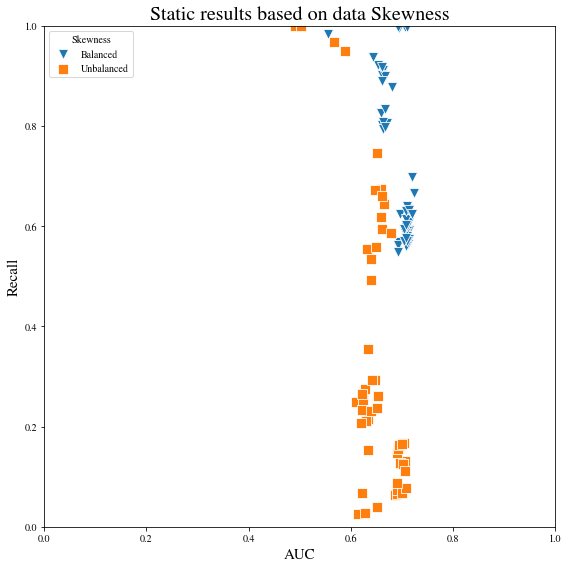

In [33]:
#############################################################################
# SKEWNESS
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & 
                      (df_results['DataType'] != 'TS')].copy()
df_bal   = df[df['Skewness'] == 'Bal']
df_unbal = df[df['Skewness'] == 'Unbal']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall", marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall", marker = "s", s=100)

plt.legend(title='Skewness', loc='upper left', labels=['Balanced', 'Unbalanced'])
plt.title('Static results based on data Skewness', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_Skewness_full.png', transparent = True, bbox_inches = "tight")
plt.show()

# 2. Data Type

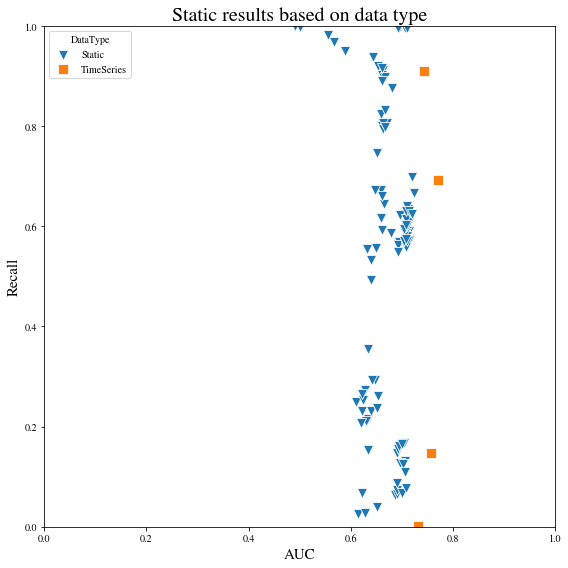

In [14]:
#############################################################################
# DATATYPE
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna())].copy()
df_bal   = df[df['DataType'] == 'Static']
df_unbal = df[df['DataType'] == 'TS']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall",  marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall",  marker = "s", s=100)
plt.legend(title='DataType', loc='upper left', labels=['Static', 'TimeSeries'])
plt.title('Static results based on data type', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
#plt.savefig('Static_DataType.png', transparent = True, bbox_inches = "tight")
plt.show()

# 3. Collection Time 

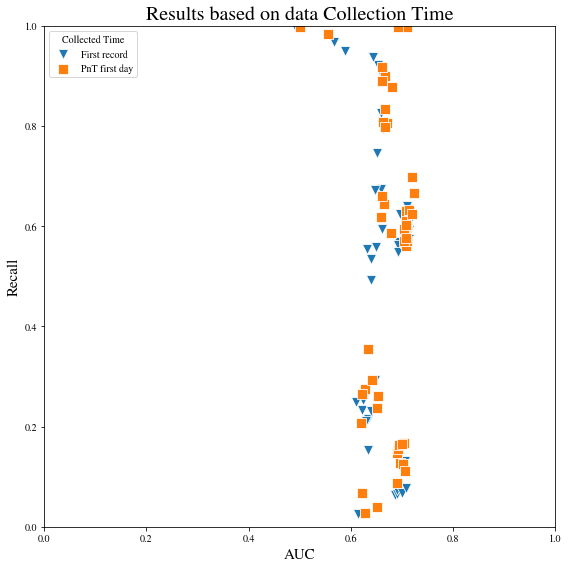

In [15]:
#############################################################################
# COLLECTION TIME FULL
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) ].copy()
df_bal   = df[df['CollectionTime'] == '1st']
df_unbal = df[df['CollectionTime'] == 'Pnt']
df_3d    = df[df['CollectionTime'] == '3d']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall", marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall", marker = "s", s=100)
#sns.scatterplot(data = df_3d,    x="AUC", y="Recall", s=100)
plt.legend(title='Collected Time', loc='upper left', labels=['First record', 'PnT first day', 'Time series'])
plt.title('Results based on data Collection Time', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_DataCollection_full.png', transparent = True, bbox_inches = "tight")
plt.show()

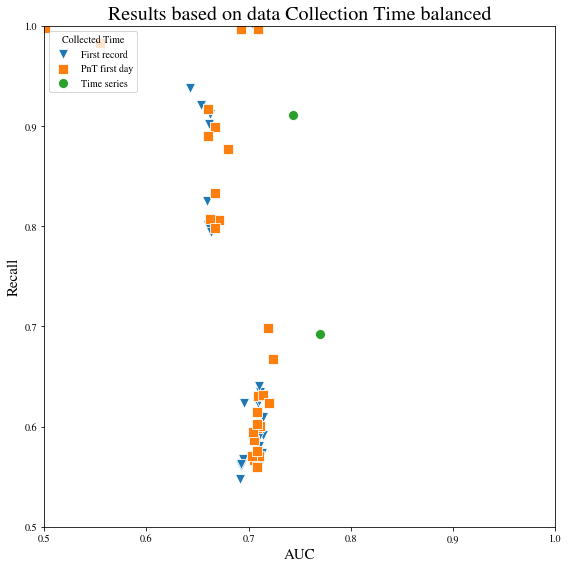

In [16]:
#############################################################################
# COLLECTION TIME
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) &
                     (df_results['Skewness'] == 'Bal')].copy()
df_bal   = df[df['CollectionTime'] == '1st']
df_unbal = df[df['CollectionTime'] == 'Pnt']
df_3d    = df[df['CollectionTime'] == '3d']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall", marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall", marker = "s", s=100)
sns.scatterplot(data = df_3d,    x="AUC", y="Recall", s=100)
plt.legend(title='Collected Time', loc='upper left', labels=['First record', 'PnT first day', 'Time series'])
plt.title('Results based on data Collection Time balanced', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_DataCollection.png', transparent = True, bbox_inches = "tight")
plt.show()

# 4. Feature Engineering 

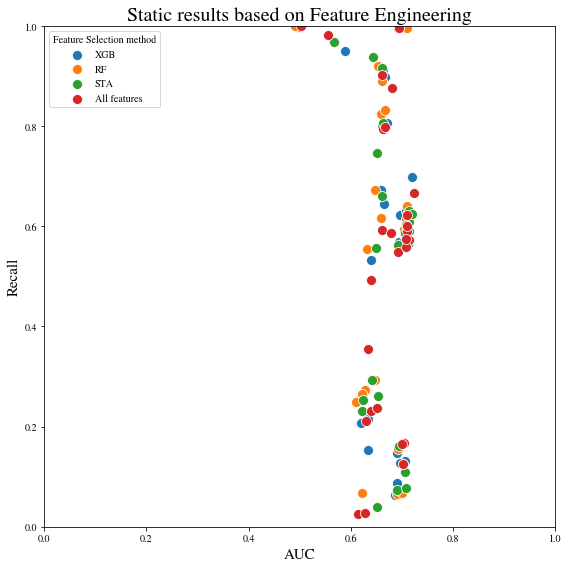

In [17]:
#############################################################################
# FEATURE ENGINEERING
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & # ].copy()
        (df_results['DataType'] != 'TS')].copy()
                      #& (df_results['Skewness']=='Bal')].copy()
df_xgb = df[df['FeatureEngineering'] == 'XGB']
df_rfc = df[df['FeatureEngineering'] == 'RF']
df_sta = df[df['FeatureEngineering'] == 'STA']
df_nof = df[(df['FeatureEngineering'] == 'NoF') | (df['FeatureEngineering'].isna())]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s= 100, label = 'XGB')
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s= 100, label = 'RF')
sns.scatterplot(data = df_sta, x="AUC", y="Recall", s= 100, label = 'STA')
sns.scatterplot(data = df_nof, x="AUC", y="Recall", s= 100, label = 'All features')

plt.legend(title='Feature Selection method', loc='upper left')
plt.title('Static results based on Feature Engineering', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_FeatureEngineering_full.png', transparent = True, bbox_inches = "tight")
plt.show()

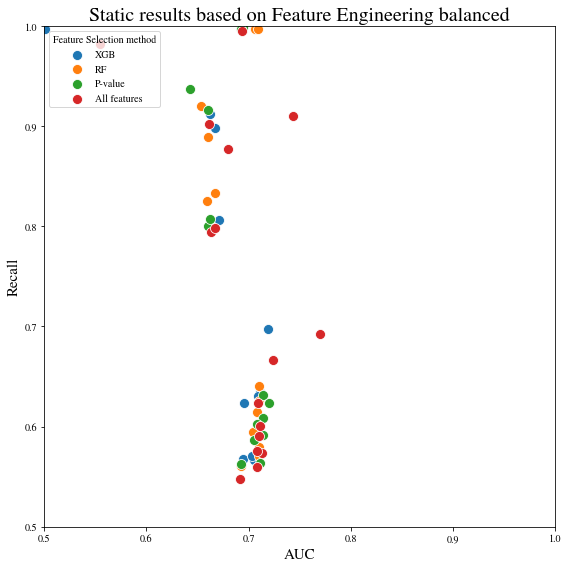

In [18]:
#############################################################################
# FEATURE ENGINEERING
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) 
                      & (df_results['Skewness']=='Bal')].copy()
df_xgb = df[df['FeatureEngineering'] == 'XGB']
df_rfc = df[df['FeatureEngineering'] == 'RF']
df_sta = df[df['FeatureEngineering'] == 'STA']
df_nof = df[(df['FeatureEngineering'] == 'NoF') | (df['FeatureEngineering'].isna())]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s= 100, label = 'XGB')
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s= 100, label = 'RF')
sns.scatterplot(data = df_sta, x="AUC", y="Recall", s= 100, label = 'P-value')
sns.scatterplot(data = df_nof, x="AUC", y="Recall", s= 100, label = 'All features')

plt.legend(title='Feature Selection method', loc='upper left')
plt.title('Static results based on Feature Engineering balanced', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_FeatureEngineering.png', transparent = True, bbox_inches = "tight")
plt.show()

# 5. Classifier

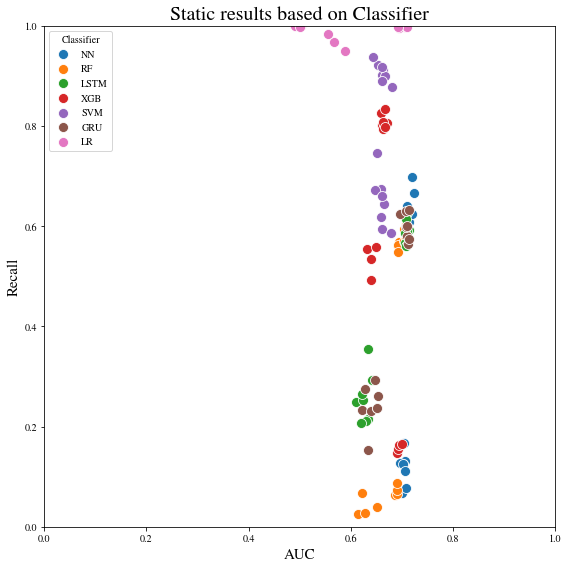

In [19]:
#############################################################################
# CLASSIFIER FULL
#############################################################################
df     = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & #].copy()
                    (df_results['DataType'] != 'TS')].copy()

df_nnc = df[df['Classifier'] == 'NN']
df_rfc = df[df['Classifier'] == 'RF']
df_lst = df[df['Classifier'] == 'LSTM']
df_xgb = df[df['Classifier'] == 'XGB']
df_svm = df[df['Classifier'] == 'SVM']
df_gru = df[df['Classifier'] == 'GRU']
df_lr  = df[df['Classifier'] == 'LR']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_nnc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lst, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_svm, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_gru, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lr, x="AUC", y="Recall", s=100)
plt.legend(title='Classifier', loc='upper left', labels=['NN', 'RF', 'LSTM', 'XGB', 'SVM', 'GRU', 'LR'])
plt.title('Static results based on Classifier', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_classifier_full.png', transparent = True, bbox_inches = "tight")

plt.show()

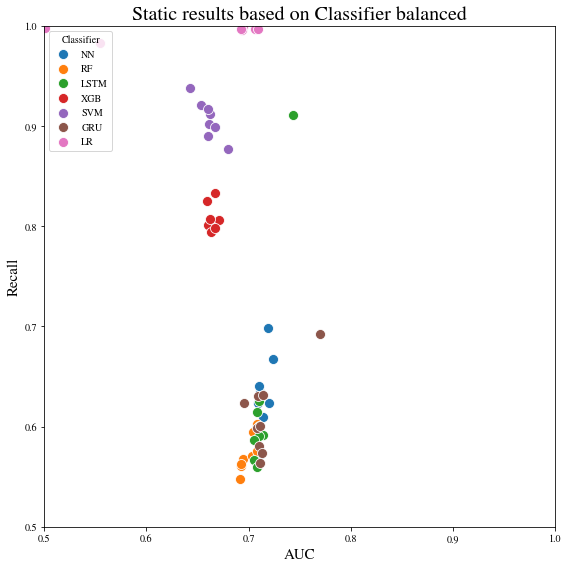

In [20]:
#############################################################################
# CLASSIFIER
#############################################################################
df     = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal')].copy()
df_nnc = df[df['Classifier'] == 'NN']
df_rfc = df[df['Classifier'] == 'RF']
df_lst = df[df['Classifier'] == 'LSTM']
df_xgb = df[df['Classifier'] == 'XGB']
df_svm = df[df['Classifier'] == 'SVM']
df_gru = df[df['Classifier'] == 'GRU']
df_lr  = df[df['Classifier'] == 'LR']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_nnc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lst, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_svm, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_gru, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lr , x="AUC", y="Recall", s=100)
plt.legend(title='Classifier', loc='upper left', labels=['NN', 'RF', 'LSTM', 'XGB', 'SVM', 'GRU', 'LR'])
plt.title('Static results based on Classifier balanced', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_classifier.png', transparent = True, bbox_inches = "tight")

plt.show()

# Age Stratification
## a. General

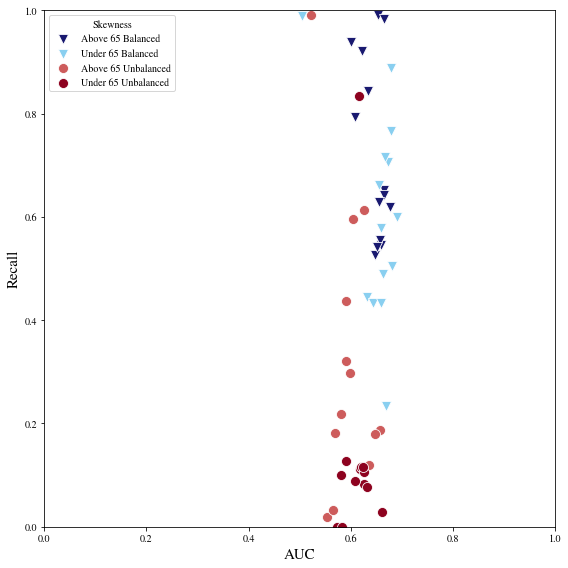

In [21]:
#############################################################################
# AGE STRATIFICATION GENERAL BALANCED
#############################################################################
colors = ['#191970', '#89CFF0', '#CD5C5C', '#8D021F']#,'#64731E','#A44CD3']
df     = df_results[(df_results['CurbStrat'].isna()) & (~df_results['AgeStrat'].isna())].copy()

df_a65_bal = df[(df['AgeStrat']== '>65') & (df['Skewness']=='Bal')]
df_u65_bal = df[(df['AgeStrat']== '<65') & (df['Skewness']=='Bal')]
df_a65_unb = df[(df['AgeStrat']== '>65') & (df['Skewness']=='Unbal')]
df_u65_unb = df[(df['AgeStrat']== '<65') & (df['Skewness']=='Unbal')]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_a65_bal, x="AUC", y="Recall", s = 100, label = 'Above 65 Balanced', marker = 'v', color = colors[0])
sns.scatterplot(data = df_u65_bal, x="AUC", y="Recall", s = 100, label = 'Under 65 Balanced', marker = 'v', color = colors[1])
sns.scatterplot(data = df_a65_unb, x="AUC", y="Recall", s = 100, label = 'Above 65 Unbalanced', color = colors[2])
sns.scatterplot(data = df_u65_unb, x="AUC", y="Recall", s = 100, label = 'Under 65 Unbalanced', color = colors[3])

plt.legend(title='Skewness', loc='upper left')
#plt.title('Age stratification models results', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Agestrat_grl.png', transparent = True, bbox_inches = "tight")
plt.show()

## b. Collection Time 

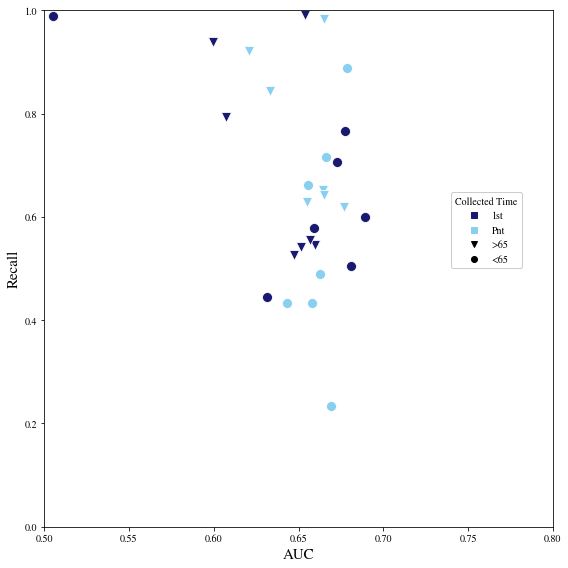

In [22]:
#############################################################################
# DATA COLLECTION
#############################################################################
colors = ['#191970', '#89CFF0']
df       = df_results[(df_results['CurbStrat'].isna()) & (~df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal')].copy()

df_1st_lo = df[(df['CollectionTime'] == '1st') & (df['AgeStrat']== '<65')]
df_pnt_lo = df[(df['CollectionTime'] == 'Pnt') & (df['AgeStrat']== '<65')]
df_1st_up = df[(df['CollectionTime'] == '1st') & (df['AgeStrat']== '>65')]
df_pnt_up = df[(df['CollectionTime'] == 'Pnt') & (df['AgeStrat']== '>65')]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_1st_lo, x="AUC", y="Recall", s=100, color = colors[0])
sns.scatterplot(data = df_pnt_lo, x="AUC", y="Recall", s=100, color = colors[1])
sns.scatterplot(data = df_1st_up, x="AUC", y="Recall", s=100, marker = 'v', color = colors[0])
sns.scatterplot(data = df_pnt_up, x="AUC", y="Recall", s=100, marker = 'v', color = colors[1])
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
markers = ['v', 'o']
handles = [f("s", colors[i]) for i in range(len(colors))]
handles += [f(markers[i], "k") for i in range(len(markers))]

labels = df['CollectionTime'].unique().tolist() + df['AgeStrat'].unique().tolist()
plt.legend( handles, labels, loc=(0.8,0.5), framealpha=1, title='Collected Time')
#plt.legend(title='Data Collection', loc='upper left', labels=['1st_<65', 'Pnt_<65','1st_>65', 'Pnt_>65'])
#plt.title('Static results based on Collection time', fontsize = 20)
plt.xlim((0.5,0.8))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Agestrat_DataCollection.png', transparent = True, bbox_inches = "tight")

plt.show()

## c. Classifier

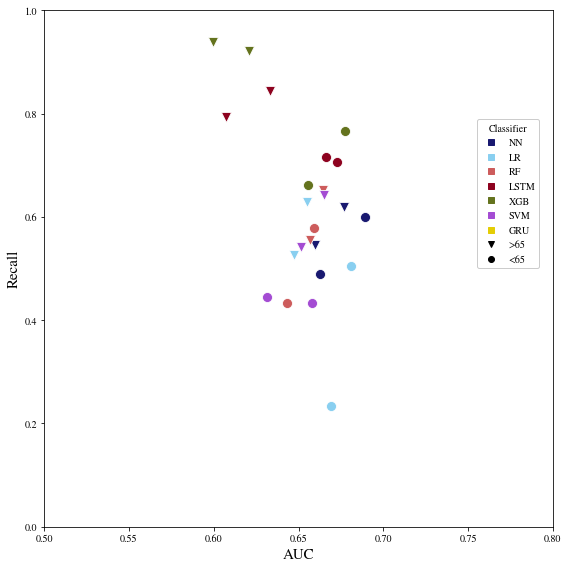

In [23]:
#############################################################################
# CLASSIFIER 
#############################################################################

colors = ['#191970', '#89CFF0', '#CD5C5C', '#8D021F','#64731E','#A44CD3', '#E4CD05']
df     = df_results[(df_results['CurbStrat'].isna()) & (~df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal')].copy()
df_nnc = df[(df['Classifier'] == 'NN') & (df['AgeStrat']== '<65')]
df_rfc = df[(df['Classifier'] == 'RF') & (df['AgeStrat']== '<65')]
df_lst = df[(df['Classifier'] == 'LSTM') & (df['AgeStrat']== '<65')]
df_xgb = df[(df['Classifier'] == 'XGB') & (df['AgeStrat']== '<65')]
df_svm = df[(df['Classifier'] == 'SVM') & (df['AgeStrat']== '<65')]
df_gru = df[(df['Classifier'] == 'GRU') & (df['AgeStrat']== '<65')]

df_nnc_ = df[(df['Classifier'] == 'NN') & (df['AgeStrat']== '>65')]
df_rfc_ = df[(df['Classifier'] == 'RF') & (df['AgeStrat']== '>65')]
df_lst_ = df[(df['Classifier'] == 'LSTM') & (df['AgeStrat']== '>65')]
df_xgb_ = df[(df['Classifier'] == 'XGB') & (df['AgeStrat']== '>65')]
df_svm_ = df[(df['Classifier'] == 'SVM') & (df['AgeStrat']== '>65')]
df_gru_ = df[(df['Classifier'] == 'GRU') & (df['AgeStrat']== '>65')]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_nnc, x="AUC", y="Recall", s=100, color = colors[0])
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s=100, color = colors[1])
sns.scatterplot(data = df_lst, x="AUC", y="Recall", s=100, color = colors[2])
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s=100, color = colors[3])
sns.scatterplot(data = df_svm, x="AUC", y="Recall", s=100, color = colors[4])
sns.scatterplot(data = df_gru, x="AUC", y="Recall", s=100, color = colors[5])

sns.scatterplot(data = df_nnc_, x="AUC", y="Recall", s=100, color = colors[0], marker = 'v')
sns.scatterplot(data = df_rfc_, x="AUC", y="Recall", s=100, color = colors[1], marker = 'v')
sns.scatterplot(data = df_lst_, x="AUC", y="Recall", s=100, color = colors[2], marker = 'v')
sns.scatterplot(data = df_xgb_, x="AUC", y="Recall", s=100, color = colors[3], marker = 'v')
sns.scatterplot(data = df_svm_, x="AUC", y="Recall", s=100, color = colors[4], marker = 'v')
sns.scatterplot(data = df_gru_, x="AUC", y="Recall", s=100, color = colors[5], marker = 'v')

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
markers = ['v', 'o']
handles = [f("s", colors[i]) for i in range(len(colors))]
handles += [f(markers[i], "k") for i in range(len(markers))]

labels = df['Classifier'].unique().tolist() + df['AgeStrat'].unique().tolist()
plt.legend( handles, labels, loc=(0.85,0.5), framealpha=1, title='Classifier')

#plt.legend(title='Classifier', loc='upper left', labels=['NN', 'RF', 'LSTM', 'XGB', 'SVM', 'GRU'])
#plt.title('Age Stratification under 65 based on Classifier', fontsize = 20)
plt.xlim((0.5,0.8))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Agestrat_classifier.png', transparent = True, bbox_inches = "tight")
plt.show()

# CURB65 Stratification
## a. General 

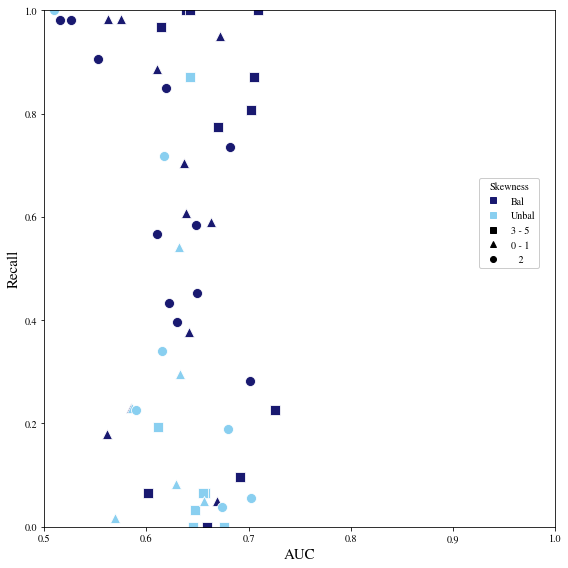

In [24]:
#############################################################################
# CURB STRATIFICATION - by classifier
#############################################################################
df      = df_results[(~df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) ].copy()
                    # (df_results['Skewness']=='Unbal') & (df_results['CollectionTime']== '1st')].copy()
markers = ["s", "^", "o"]
colors  = ['#191970', '#89CFF0']#, '#CD5C5C', '#8D021F','#64731E']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
for i, skw in enumerate(df['Skewness'].unique()):
    for j, curb in enumerate(df['CurbStrat'].unique()):
        df_plot = df[(df['CurbStrat']== curb) & (df['Skewness']==skw)]
        sns.scatterplot(data = df_plot, x="AUC", y="Recall", marker=markers[j], color=colors[i], s=100)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(len(colors))]
handles += [f(markers[i], "k") for i in range(len(markers))]

labels = df['Skewness'].unique().tolist() + df['CurbStrat'].unique().tolist()
plt.legend(handles, labels, loc=(0.85,0.5), framealpha=1, title = 'Skewness')
#plt.title('CURB65 stratification results based on Classifier', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Curbstrat_General.png', transparent = True, bbox_inches = "tight")
plt.show()



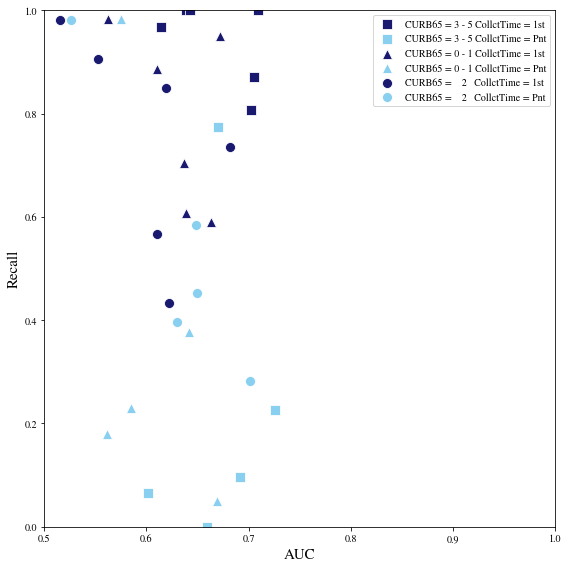

In [25]:
#############################################################################
# CURB STRATIFICATION 
#############################################################################
df      = df_results[(~df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) &
                    (df_results['Skewness']=='Bal')].copy()
markers = ["s", "^", "o"]
colors  = ['#191970', '#89CFF0']#, '#CD5C5C', '#8D021F','#64731E']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)

for j, curb in enumerate(df['CurbStrat'].unique()):
    for i, skw in enumerate(df['CollectionTime'].unique()):
        df_plot = df[(df['CurbStrat']== curb) & (df['CollectionTime']== skw)]
        lab = "CURB65 = " + curb + " CollctTime = " + skw
        sns.scatterplot(data = df_plot, x="AUC", y="Recall", label = lab, s=100,
                        marker = markers[j], color = colors[i])#, color=colors[j])

plt.legend()
#plt.title('CURB65 stratification results', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Curbstrat_CollectionTime.png', transparent = True, bbox_inches = "tight")
plt.show()

In [26]:
df['Classifier'].unique()

array(['XGB', 'SVM', 'RF', 'LSTM', 'LR', 'NN'], dtype=object)

In [27]:
len(handles)

5

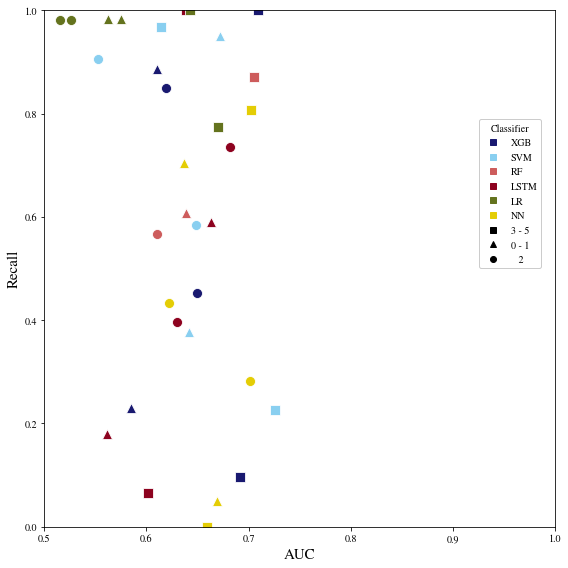

In [28]:
#############################################################################
# CURB STRATIFICATION
#############################################################################
df      = df_results[(~df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal') ].copy()
markers = ["s", "^", "o"]
#colors  = ["crimson", "skyblue", "gold", "chocolate", "lime"]
colors  = ['#191970', '#89CFF0', '#CD5C5C', '#8D021F','#64731E', '#E4CD05']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
for i, clf in enumerate(df['Classifier'].unique()):
    for j, curb in enumerate(df['CurbStrat'].unique()):
        df_plot = df[(df['CurbStrat']== curb) & (df['Classifier']==clf)]
        sns.scatterplot(data = df_plot, x="AUC", y="Recall", marker=markers[j], color=colors[i], s=100)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(6)]
handles += [f(markers[i], "k") for i in range(3)]

labels = df['Classifier'].unique().tolist() + df['CurbStrat'].unique().tolist()
plt.legend(handles, labels, loc=(0.85,0.5), framealpha=1, title='Classifier')
#plt.title('CURB65 stratification results based on Classifier', fontsize = 20)
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.xlim((0.5,1))
plt.ylim((0,1))
plt.tight_layout()
plt.savefig('Curbstrat_classifier.png', transparent = True, bbox_inches = "tight")

plt.show()

In [29]:
df      = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna())].copy() #100
df      = df[(df['Skewness']=='Bal')].copy() # 50
df      = df[(df['CollectionTime']=='1st')].copy() # 24
print(len(df_results))
print(len(df))
df

220
28


,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,1st,Bal,XGB,NN,NaN,NaN,0.711249,0.63459,0.358011,0.657939,0.206614,0.457767
0,Static,1st,Bal,RF,NN,NaN,NaN,0.710274,0.640646,0.364193,0.663757,0.199323,0.46439
0,Static,1st,Bal,STA,NN,NaN,NaN,0.714024,0.609017,0.369237,0.674322,0.199328,0.459741
0,Static,1st,Bal,NoF,NN,NaN,NaN,0.709036,0.623149,0.356428,0.658245,0.21314,0.453477
0,Static,1st,Bal,XGB,LR,NaN,NaN,0.693473,0.997308,0.234977,0.260603,0.620843,0.380341
0,Static,1st,Bal,RF,LR,NaN,NaN,0.706461,0.996635,0.232752,0.251723,0.607325,0.377373
0,Static,1st,Bal,STA,LR,NaN,NaN,0.694783,0.998654,0.23326,0.252794,0.627923,0.378186
0,Static,1st,Bal,NoF,LR,NaN,NaN,0.693912,0.995289,0.234986,0.261675,0.619591,0.380206
0,Static,1st,Bal,XGB,RF,NaN,NaN,0.694314,0.567968,0.36348,0.675394,0.20732,0.443277
0,Static,1st,Bal,RF,RF,NaN,NaN,0.692957,0.560565,0.356745,0.670035,0.204695,0.436012


In [30]:
df

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,1st,Bal,XGB,NN,NaN,NaN,0.711249,0.63459,0.358011,0.657939,0.206614,0.457767
0,Static,1st,Bal,RF,NN,NaN,NaN,0.710274,0.640646,0.364193,0.663757,0.199323,0.46439
0,Static,1st,Bal,STA,NN,NaN,NaN,0.714024,0.609017,0.369237,0.674322,0.199328,0.459741
0,Static,1st,Bal,NoF,NN,NaN,NaN,0.709036,0.623149,0.356428,0.658245,0.21314,0.453477
0,Static,1st,Bal,XGB,LR,NaN,NaN,0.693473,0.997308,0.234977,0.260603,0.620843,0.380341
0,Static,1st,Bal,RF,LR,NaN,NaN,0.706461,0.996635,0.232752,0.251723,0.607325,0.377373
0,Static,1st,Bal,STA,LR,NaN,NaN,0.694783,0.998654,0.23326,0.252794,0.627923,0.378186
0,Static,1st,Bal,NoF,LR,NaN,NaN,0.693912,0.995289,0.234986,0.261675,0.619591,0.380206
0,Static,1st,Bal,XGB,RF,NaN,NaN,0.694314,0.567968,0.36348,0.675394,0.20732,0.443277
0,Static,1st,Bal,RF,RF,NaN,NaN,0.692957,0.560565,0.356745,0.670035,0.204695,0.436012


In [31]:
df_results.to_csv('morotality_models_results.csv')

# Summary

In [32]:
df_results.sort_values(by=['AUC'], ascending = False).head(50)

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
1,TS,3d,Bal,NaN,GRU,NaN,NaN,0.770253,0.692463,0.41259,0.705711,0.178024,0.517085
0,TS,3d,Unbal,NaN,GRU,NaN,NaN,0.756973,0.147376,0.657658,0.788547,0.157091,0.240792
3,TS,3d,Bal,NaN,LSTM,NaN,NaN,0.743233,0.910498,0.287872,0.467157,0.292497,0.437439
2,TS,3d,Unbal,NaN,LSTM,NaN,NaN,0.732132,0.000673,1.0,0.772623,0.161947,0.001345
0,Static,Pnt,Bal,NaN,SVM,3 - 5,NaN,0.726148,0.225806,0.2,0.872861,0.068276,0.212121
0,Static,Pnt,Bal,NoF,NN,NaN,NaN,0.724218,0.666891,0.366901,0.662379,0.197492,0.47337
0,Static,Pnt,Bal,STA,NN,NaN,NaN,0.719536,0.623822,0.37364,0.676466,0.203524,0.467356
0,Static,Pnt,Bal,XGB,NN,NaN,NaN,0.719132,0.697847,0.350338,0.636809,0.210815,0.466487
0,Static,Pnt,Bal,STA,GRU,NaN,NaN,0.714433,0.631225,0.368132,0.669576,0.203327,0.465047
0,Static,1st,Bal,STA,NN,NaN,NaN,0.714024,0.609017,0.369237,0.674322,0.199328,0.459741
